# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}units=metric&q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saksaul'skiy
City not found. Skipping...
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | illizi
Processing Record 5 of Set 1 | devon
Processing Record 6 of Set 1 | port mathurin
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | vice
Processing Record 9 of Set 1 | harstad
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | mayen abun
City not found. Skipping...
Processing Record 12 of Set 1 | katsuura
Processing Record 13 of Set 1 | kalajoki
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | ivdel'
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | armacao de buzios
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | marang
Processing Record 21 of Set 1 | virac
Processing R

Processing Record 40 of Set 4 | pacific grove
Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | spanish fort
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | caxias
Processing Record 45 of Set 4 | nykobing sjaelland
Processing Record 46 of Set 4 | kill devil hills
Processing Record 47 of Set 4 | kenai
Processing Record 48 of Set 4 | divnomorskoye
Processing Record 49 of Set 4 | brookings
Processing Record 0 of Set 5 | iquique
Processing Record 1 of Set 5 | abepura
Processing Record 2 of Set 5 | vernon
Processing Record 3 of Set 5 | kluang
Processing Record 4 of Set 5 | sarangani
Processing Record 5 of Set 5 | cill airne
Processing Record 6 of Set 5 | sao desiderio
Processing Record 7 of Set 5 | labrador city
Processing Record 8 of Set 5 | zapala
Processing Record 9 of Set 5 | banda aceh
Processing Record 10 of Set 5 | melfort
Processing Record 11 of Set 5 | kulhudhuffushi
Processing Record 12 of Set 5 | masterton
Processing Record 13 of

Processing Record 31 of Set 8 | urangan
Processing Record 32 of Set 8 | sarina
Processing Record 33 of Set 8 | mangrol
Processing Record 34 of Set 8 | akureyri
Processing Record 35 of Set 8 | urzhar
Processing Record 36 of Set 8 | taltal
Processing Record 37 of Set 8 | argo
Processing Record 38 of Set 8 | palwancha
Processing Record 39 of Set 8 | talcahuano
Processing Record 40 of Set 8 | tura
Processing Record 41 of Set 8 | kirs
Processing Record 42 of Set 8 | prieska
Processing Record 43 of Set 8 | lucapa
Processing Record 44 of Set 8 | northam
Processing Record 45 of Set 8 | lumberton
Processing Record 46 of Set 8 | vadso
Processing Record 47 of Set 8 | ponmana
City not found. Skipping...
Processing Record 48 of Set 8 | usogorsk
Processing Record 49 of Set 8 | el segundo
Processing Record 0 of Set 9 | polyarnyy
Processing Record 1 of Set 9 | nova vicosa
Processing Record 2 of Set 9 | vyritsa
Processing Record 3 of Set 9 | bodden town
Processing Record 4 of Set 9 | muynoq
Processing 

Processing Record 24 of Set 12 | loiza
Processing Record 25 of Set 12 | bambanglipuro
Processing Record 26 of Set 12 | pacocha
Processing Record 27 of Set 12 | nam som
Processing Record 28 of Set 12 | flin flon
Processing Record 29 of Set 12 | champerico
Processing Record 30 of Set 12 | suileng
Processing Record 31 of Set 12 | bushland beach
City not found. Skipping...
Processing Record 32 of Set 12 | paita
Processing Record 33 of Set 12 | tazacorte
Processing Record 34 of Set 12 | wanning
Processing Record 35 of Set 12 | anabar
City not found. Skipping...
Processing Record 36 of Set 12 | naha
Processing Record 37 of Set 12 | troitsko-pechorsk
Processing Record 38 of Set 12 | vorkuta
Processing Record 39 of Set 12 | maridi
Processing Record 40 of Set 12 | soroti
Processing Record 41 of Set 12 | popovaca
Processing Record 42 of Set 12 | jayapura
Processing Record 43 of Set 12 | peterborough
Processing Record 44 of Set 12 | fort bragg
-----------------------------
Data Retrieval Complete

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) 

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.90,76,93,4.50,PN,1708301862
1,waitangi,-43.9535,-176.5597,19.34,93,5,12.26,NZ,1708301863
2,illizi,26.4833,8.4667,13.89,19,8,4.69,DZ,1708301864
3,devon,50.7500,-3.7500,10.23,94,95,5.01,GB,1708301826
4,port mathurin,-19.6833,63.4167,26.42,71,66,5.56,MU,1708301866


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.90,76,93,4.50,PN,1708301862
1,waitangi,-43.9535,-176.5597,19.34,93,5,12.26,NZ,1708301863
2,illizi,26.4833,8.4667,13.89,19,8,4.69,DZ,1708301864
3,devon,50.7500,-3.7500,10.23,94,95,5.01,GB,1708301826
4,port mathurin,-19.6833,63.4167,26.42,71,66,5.56,MU,1708301866


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

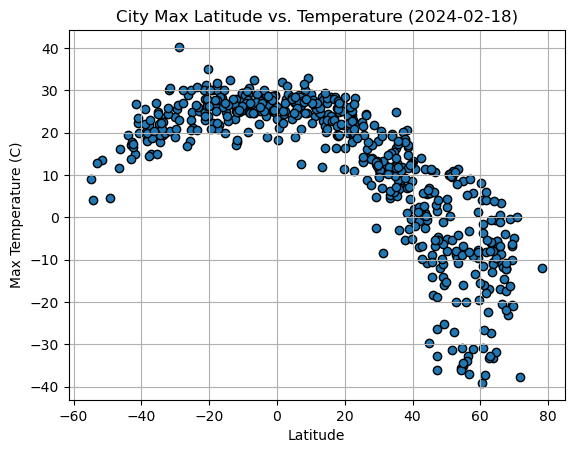

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values,edgecolors='black')
plt.grid()

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({time.strftime('%Y-%m-%d')})") 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

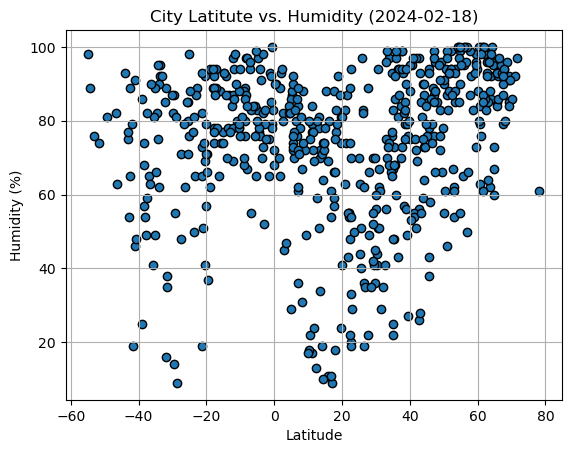

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values,edgecolors='black')
plt.grid()

# Incorporate the other graph properties
plt.title(f"City Latitute vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

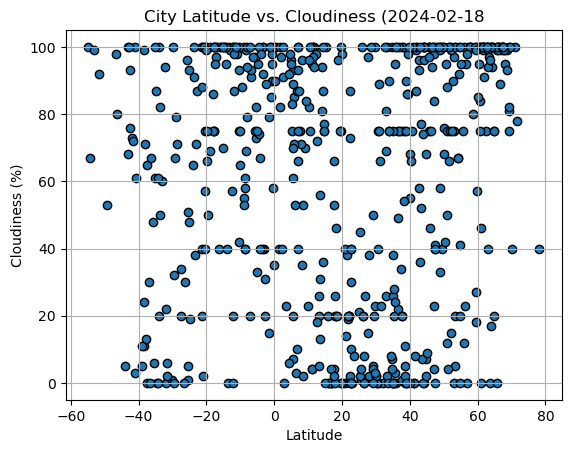

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors='black')
plt.grid()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')}") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

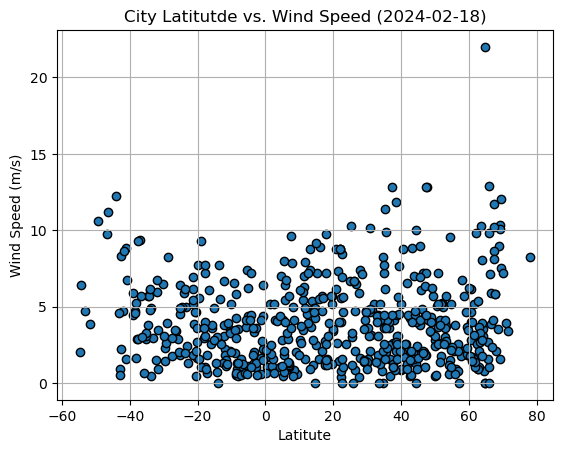

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors='black')
plt.grid()

# Incorporate the other graph properties
plt.title(f"City Latitutde vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.xlabel("Latitute")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_lin_reg_plots(x_values,y_values, title,x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    plt.scatter(x_values,y_values)

    # Incorporate the other graph properties
    plt.title(f"City Latitutde vs. {title} ({time.strftime('%Y-%m-%d')})")
    plt.xlabel("Latitude")
    plt.ylabel(title)

    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)) ##
    
    plt.plot(x_values,regress_values,"r-")
    
    plt.annotate(line_eq, (x,y), fontsize=15, color="red")
    print(f"The r-value is: {rvalue}")
    
    
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,illizi,26.4833,8.4667,13.89,19,8,4.69,DZ,1708301864
3,devon,50.7500,-3.7500,10.23,94,95,5.01,GB,1708301826
5,albany,42.6001,-73.9662,-0.18,56,96,4.26,US,1708301867
7,harstad,68.7990,16.5293,-0.34,91,99,8.94,NO,1708301868
9,katsuura,35.1333,140.3000,16.38,67,38,7.17,JP,1708301872


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.90,76,93,4.50,PN,1708301862
1,waitangi,-43.9535,-176.5597,19.34,93,5,12.26,NZ,1708301863
4,port mathurin,-19.6833,63.4167,26.42,71,66,5.56,MU,1708301866
6,vice,-5.4167,-80.7833,28.62,65,73,7.39,PE,1708301867
8,puerto natales,-51.7236,-72.4875,13.45,74,92,3.86,CL,1708301870


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8298377500677243


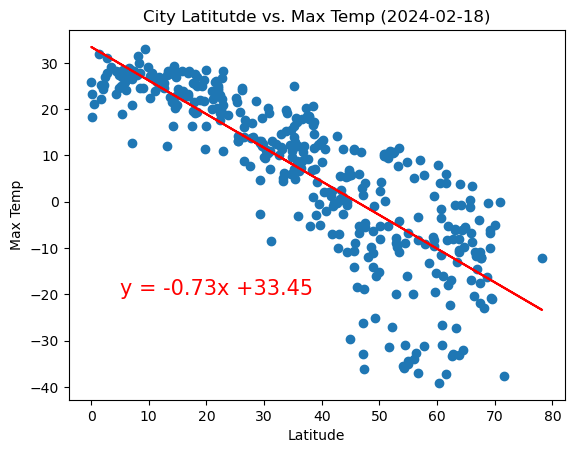

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
create_lin_reg_plots(x_values, y_values, "Max Temp",5,-20)

# Save the figure
plt.savefig(f"output_data/Lat_vs_Max_Temp_North.png")

# Show plot
plt.show()

The r-value is: 0.6136309831126129


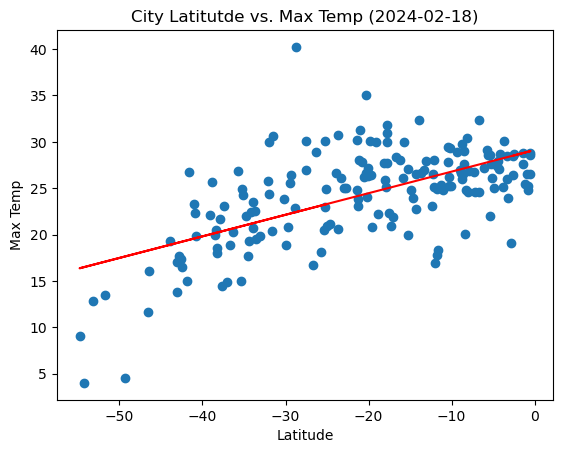

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
create_lin_reg_plots(x_values, y_values, "Max Temp",-25,50)

# Save the figure
plt.savefig(f"output_data/Lat_vs_Max_Temp_South.png")

# Show plot
plt.show()

**Discussion about the linear relationship between Latitude and Max Temp:
- the northern hemisphere has a negative linear relationship while the southern hemisphere has a positive relationship, however, both have higher max temps as the latitude approaches 0.
- the relationship between max temp and latitude is stronger in the northern hemisphere, where the r-value is .8, compared to the southern hemisphere, where it's .6.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3989309712169279


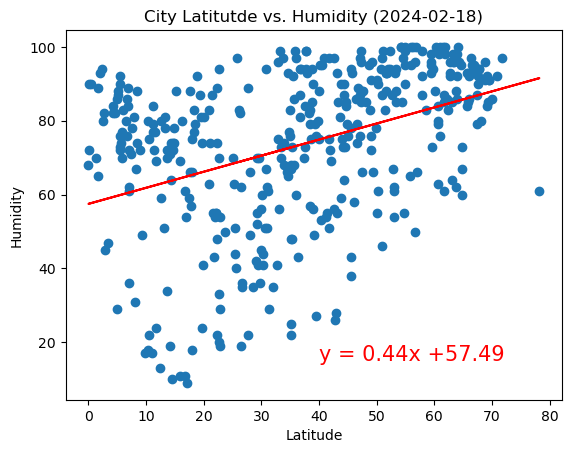

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
create_lin_reg_plots(x_values, y_values, "Humidity",40,15)

# Save the figure
plt.savefig(f"output_data/Lat_vs_Humidity_North.png")

# Show plot
plt.show()

The r-value is: 0.2753616392685772


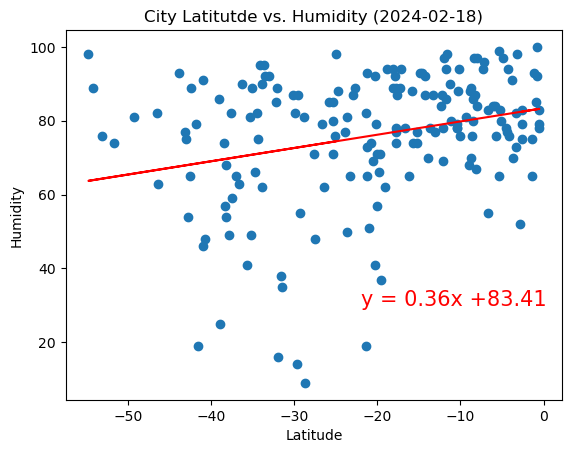

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
create_lin_reg_plots(x_values, y_values, "Humidity",-22,30)

# Save the figure
plt.savefig(f"output_data/Lat_vs_Humidity_South.png")

# Show plot
plt.show()

**Discussion about the linear relationship between Latitude and Humidity:
- both northern and southern linear regressions show a positive relationship, which means that humidity goes up the further a city is from the equator in the northern hemisphere, and goes down the futher a city is from the equartor in the southern hemisphere. 
- neither the northern hemisphere nor the southern hemisphere, however, demonstrates a strong relationship between Latitude and Humidity with r-values of about .4 and .3, respectively.
- again, the correlation is stronger in the northern hemisphere than in the southern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2568956909424987


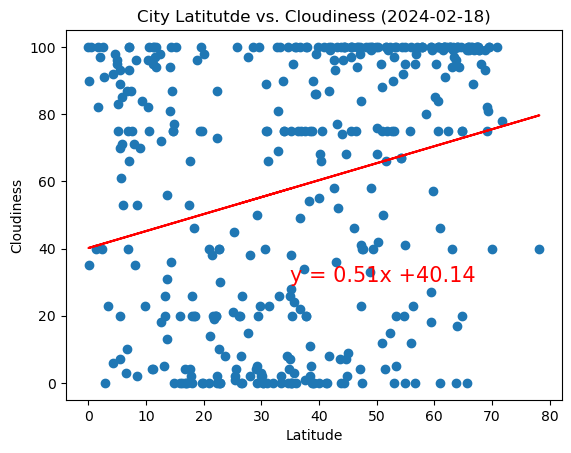

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
create_lin_reg_plots(x_values, y_values, "Cloudiness",35,30)

# Save the figure
plt.savefig(f"output_data/Lat_vs_Cloudiness_North.png")

# Show plot
plt.show()

The r-value is: 0.24001850899739385


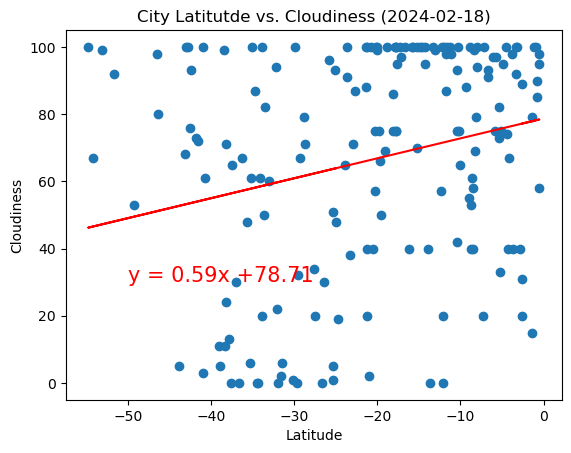

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
create_lin_reg_plots(x_values, y_values, "Cloudiness",-50,30)

# Save the figure
plt.savefig(f"output_data/Lat_vs_Cloudiness_South.png")

# Show plot
plt.show()

**Discussion about the linear relationship between Cloudiness and Latitude:
- both northern and southern hemisphere linear regressions again show a positive relationship, meaning that while cloudiness increases in the northern hemisphere the further a city is from the equator, in the southern hemisphere cloudiness increases in cities closer to the equator.
- neither the northern hemisphere nor the southern hemisphere demonstrates a strong relationship with r-values at approximately .25 and .24, respectively. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08549482160867242


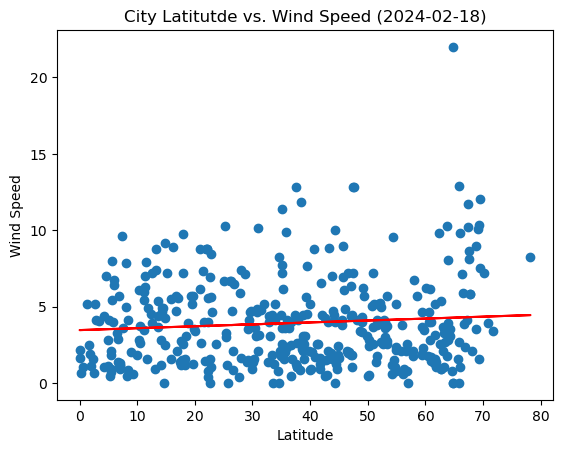

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
create_lin_reg_plots(x_values, y_values, "Wind Speed",5,27)

# Save the figure
plt.savefig(f"output_data/Lat_vs_Wind_Speed_North.png")

# Show plot
plt.show()

The r-value is: -0.37137336955447603


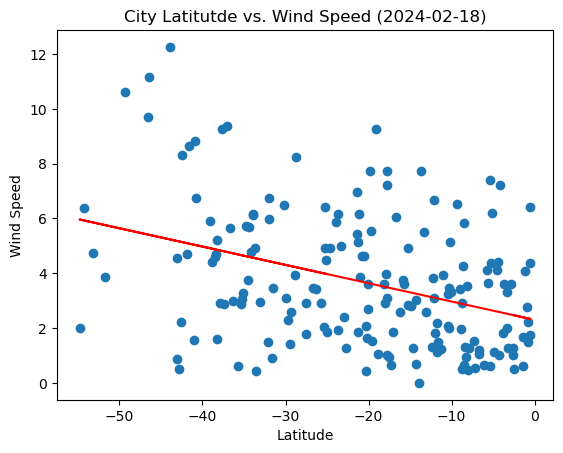

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
create_lin_reg_plots(x_values, y_values, "Wind Speed",-21,23)

# Save the figure
plt.savefig(f"output_data/Lat_vs_Wind_Speed_South.png")

# Show plot
plt.show()

**Discussion about the linear relationship between Wind Speed and Latitude:
- the majority of the cities in the northern hemisphere have wind speeds under 10 m/s in the northern hemisphere regardless of how far or near they are to the equator, with fairly even distribution, leading to a mostly flat linear regression.
- in the sourthern hemisphere, however, the linear regression shows a negative relationship where wind speed is lessens for cities as the latitude approaches the equator. 
- the r-value for the northern hemisphere is .08 compared to the southern hemisphere of .37 shows that location in the southern hemisphere has a bigger impact on wind speed below the equator than it does for the northern hemisphere. 